# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [2]:
df_train = pd.read_csv("../files/data/TWIN/CORNER_CRACK_COUNTERSUNK_HOLE/TWIN_CORNER_CRACK_CS2_QUARTER_ELLIPSE_PART_2_TRAIN.csv")
df_train

,c_index,W/R,a1/c1,a1/t,a2/c2,a2/t,r/t,b/t,phi_1,phi_2,K1-T,K2-T,K1-B,K2-B,K1-P,K2-P
0,2.0,4.0,0.1,0.1,0.1,0.2,2.0,0.5,0.057913,0.057913,0.857135,0.989701,0.772732,1.022968,0.272918,0.256085
1,2.0,4.0,0.1,0.1,0.1,0.2,2.0,0.5,0.069369,0.069369,0.872542,1.007342,0.785567,1.039412,0.277953,0.260825
2,2.0,4.0,0.1,0.1,0.1,0.2,2.0,0.5,0.080826,0.080826,0.891171,1.029146,0.801129,1.058726,0.283926,0.266475
3,2.0,4.0,0.1,0.1,0.1,0.2,2.0,0.5,0.092282,0.092282,0.912109,1.053070,0.818653,1.080857,0.290652,0.272815
4,2.0,4.0,0.1,0.1,0.1,0.2,2.0,0.5,0.103739,0.103739,0.934759,1.079075,0.837586,1.104846,0.297973,0.279716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20054523,10000.0,40.0,10.0,0.5,10.0,0.5,2.0,0.5,1.467061,1.467061,1.469514,1.469514,0.011806,0.011806,0.378779,0.378779
20054524,10000.0,40.0,10.0,0.5,10.0,0.5,2.0,0.5,1.478518,1.478518,1.445741,1.445741,0.010682,0.010682,0.372798,0.372798
20054525,10000.0,40.0,10.0,0.5,10.0,0.5,2.0,0.5,1.489974,1.489974,1.426045,1.426045,0.009715,0.009715,0.367762,0.367762
20054526,10000.0,40.0,10.0,0.5,10.0,0.5,2.0,0.5,1.501431,1.501431,1.410699,1.410699,0.008882,0.008882,0.363739,0.363739


In [3]:
# Get unique combinations of the first four columns
CC_combinations = df_train.iloc[:, 1:8].drop_duplicates().to_numpy()

print(len(CC_combinations))

156676


In [4]:
print("Different W/r values: ", np.unique(CC_combinations[:,0], axis=0))
print("Different a1/c1 values: ", np.unique(CC_combinations[:,1], axis=0))
print("Different a1/t values: ", np.unique(CC_combinations[:,2], axis=0))
print("Different a2/c2 values: ", np.unique(CC_combinations[:,3], axis=0))
print("Different a2/t values: ", np.unique(CC_combinations[:,4], axis=0))
print("Different r/t values: ", np.unique(CC_combinations[:,5], axis=0))
print("Different b/t values: ", np.unique(CC_combinations[:,6], axis=0))

Different W/r values:  [  2.4   2.6   2.8   3.6   4.    4.6   5.8   7.    8.    9.   10.   12.
  30.   40.  100. ]
Different a1/c1 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a1/t values:  [0.1 0.2 0.3 0.4 0.5]
Different a2/c2 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a2/t values:  [0.1 0.2 0.3 0.4 0.5]
Different r/t values:  [0.5 1.  1.5 2.  3.  5. ]
Different b/t values:  [0.5]


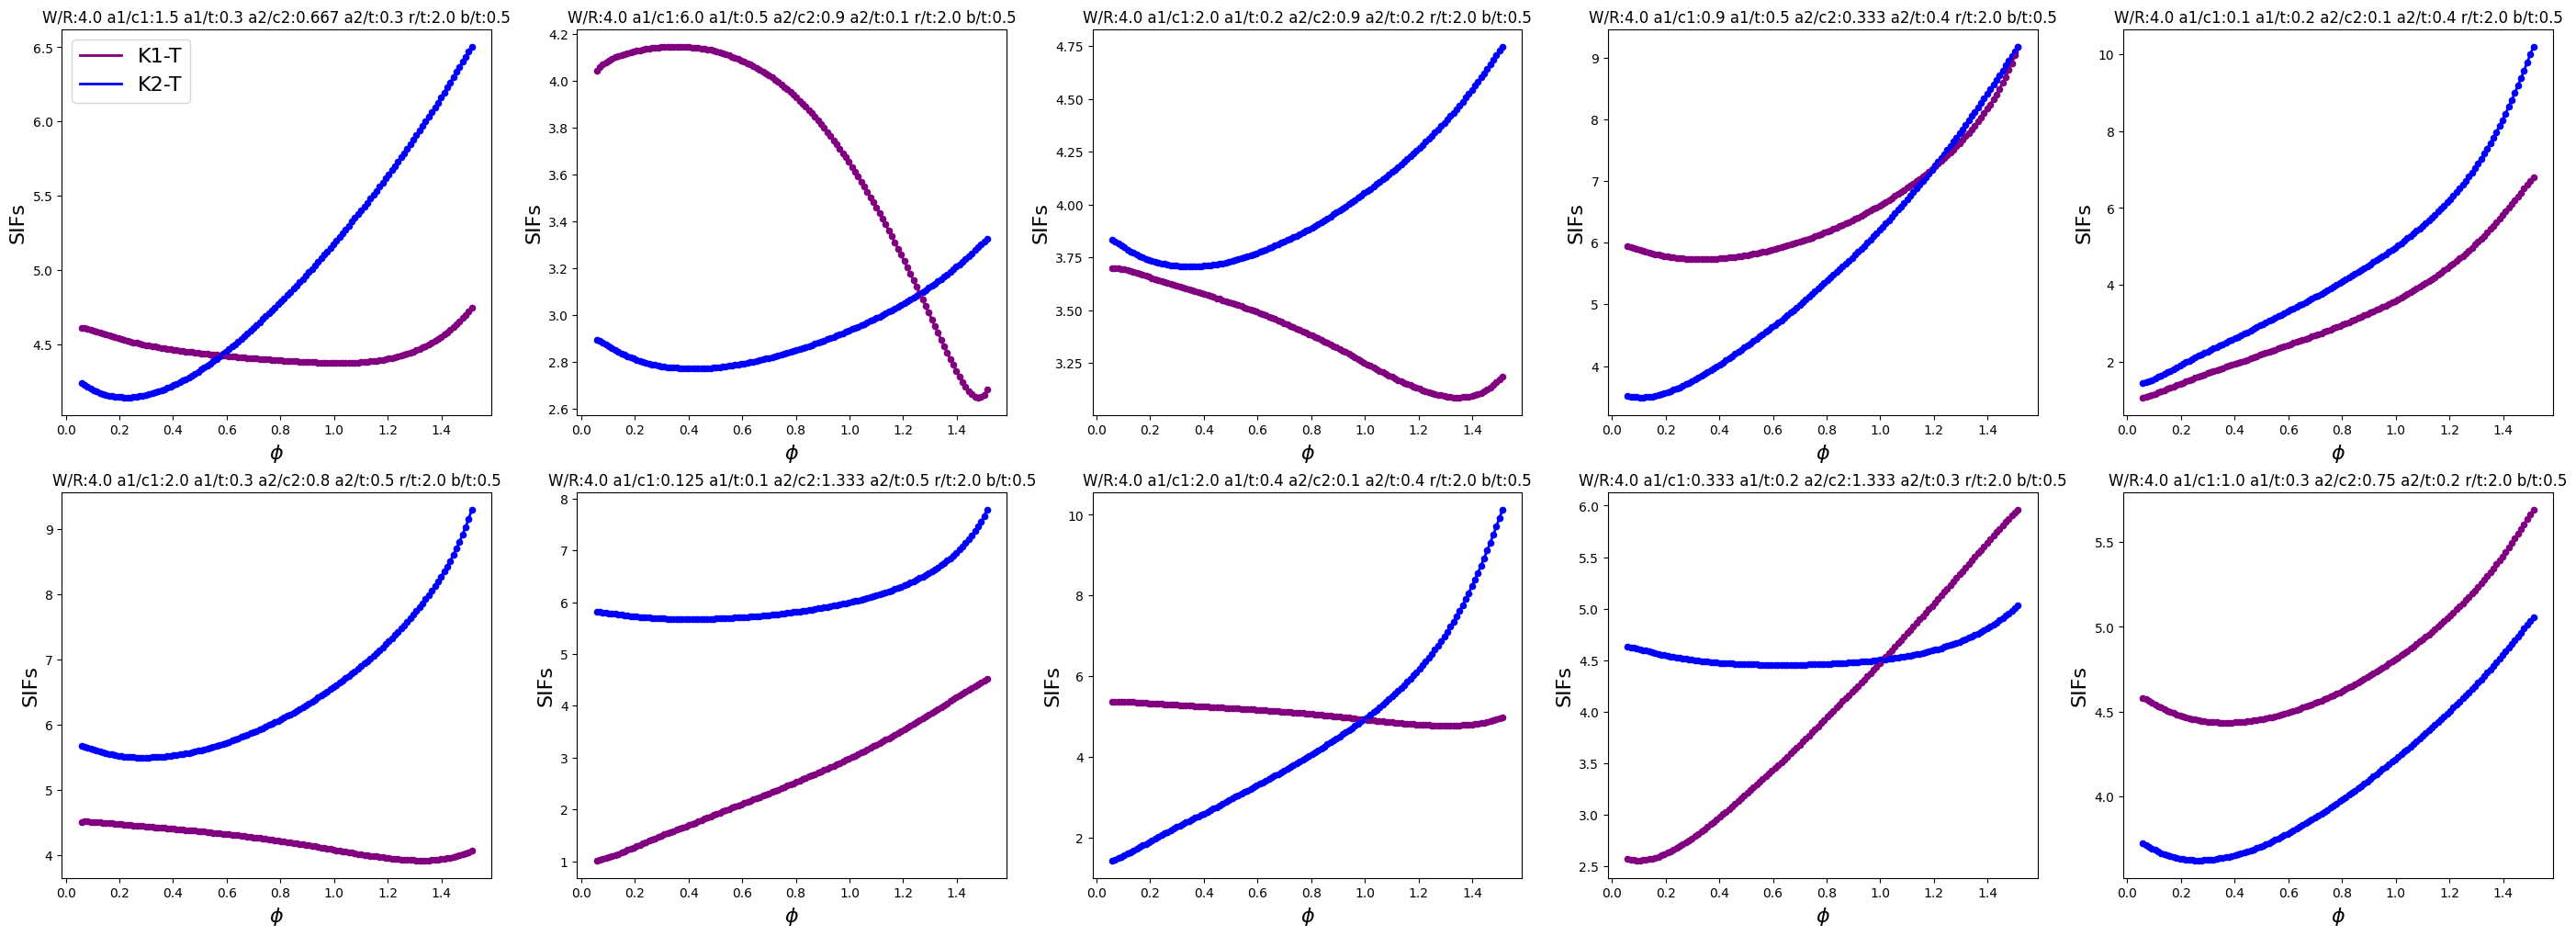

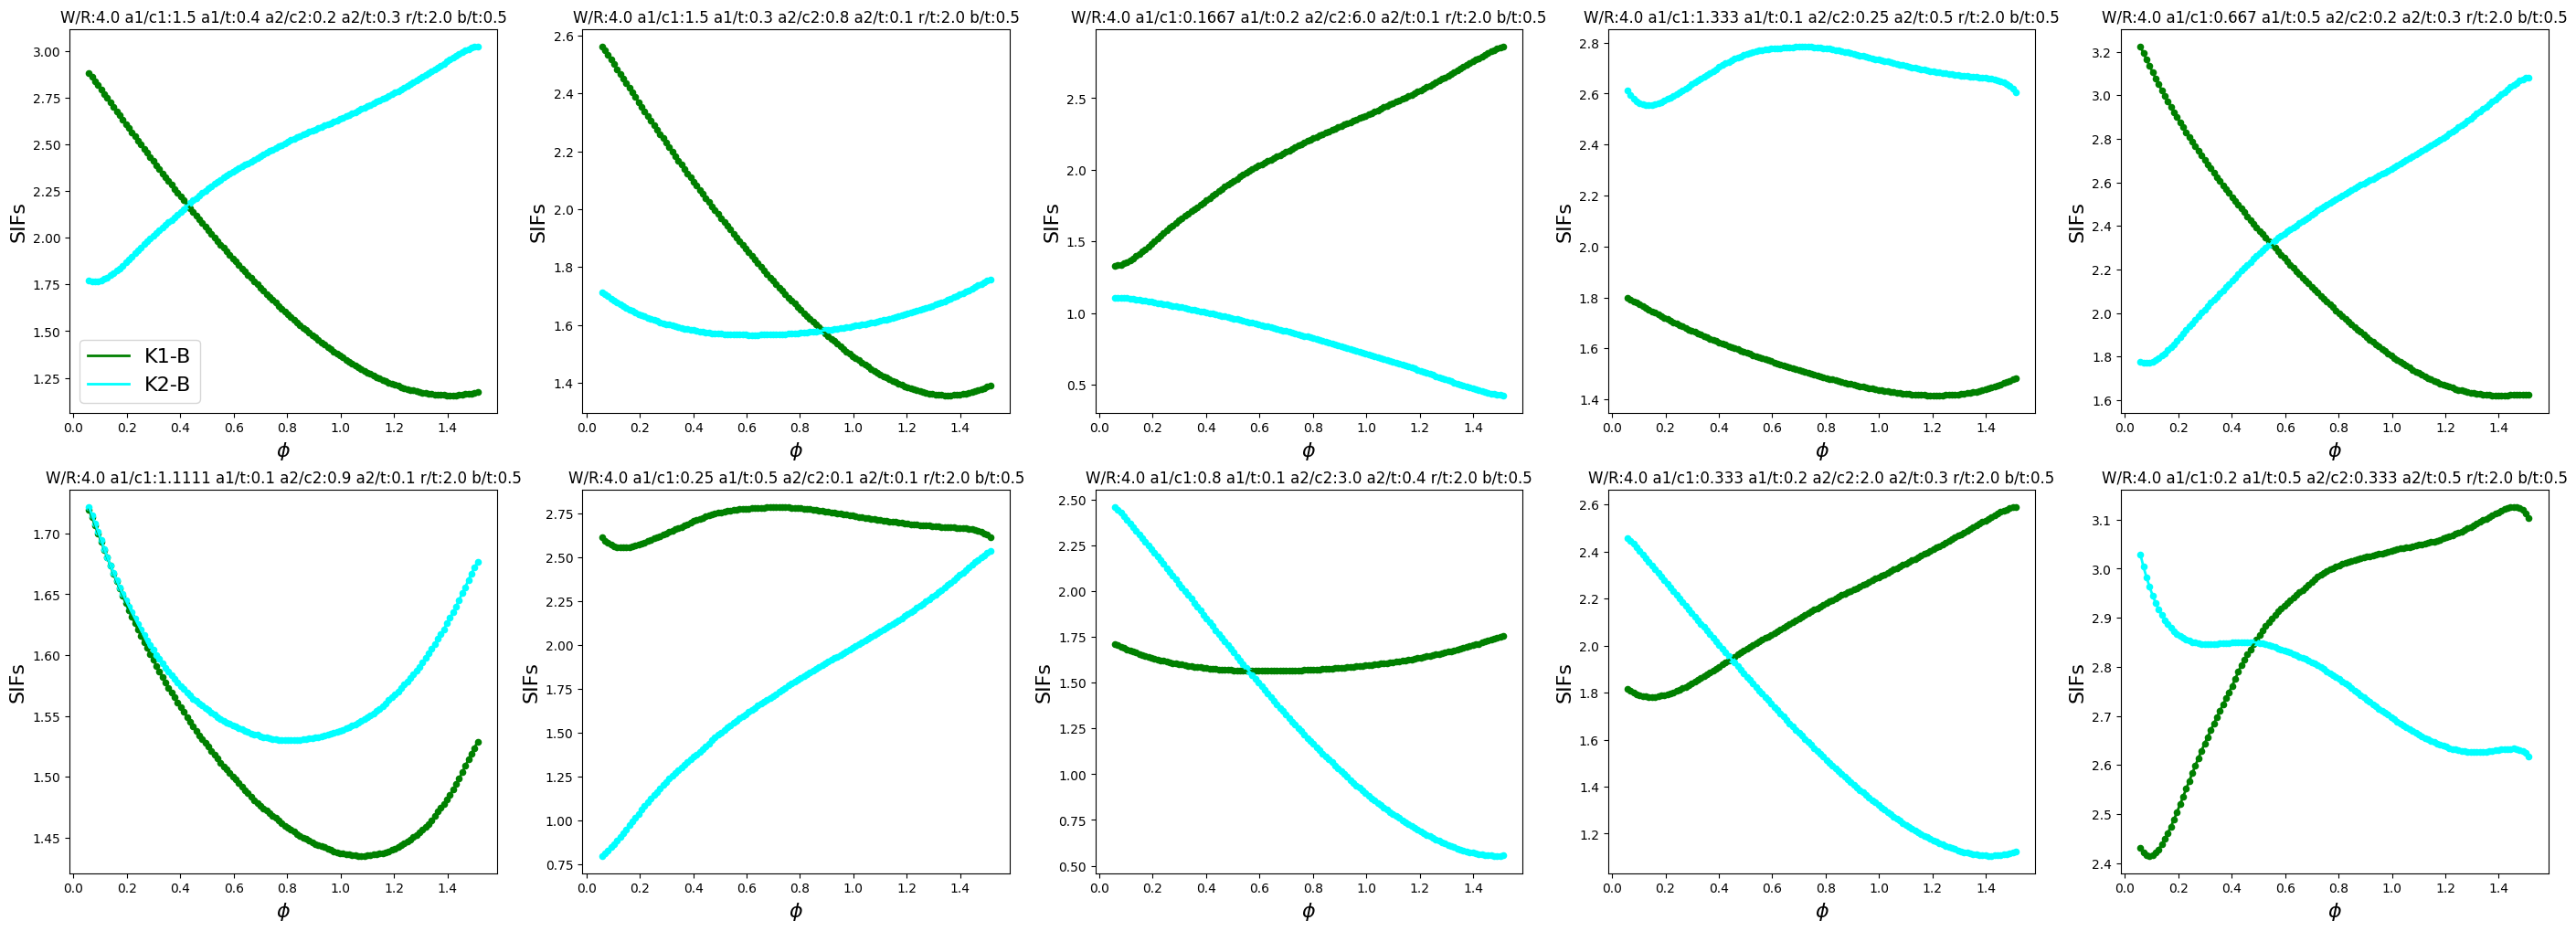

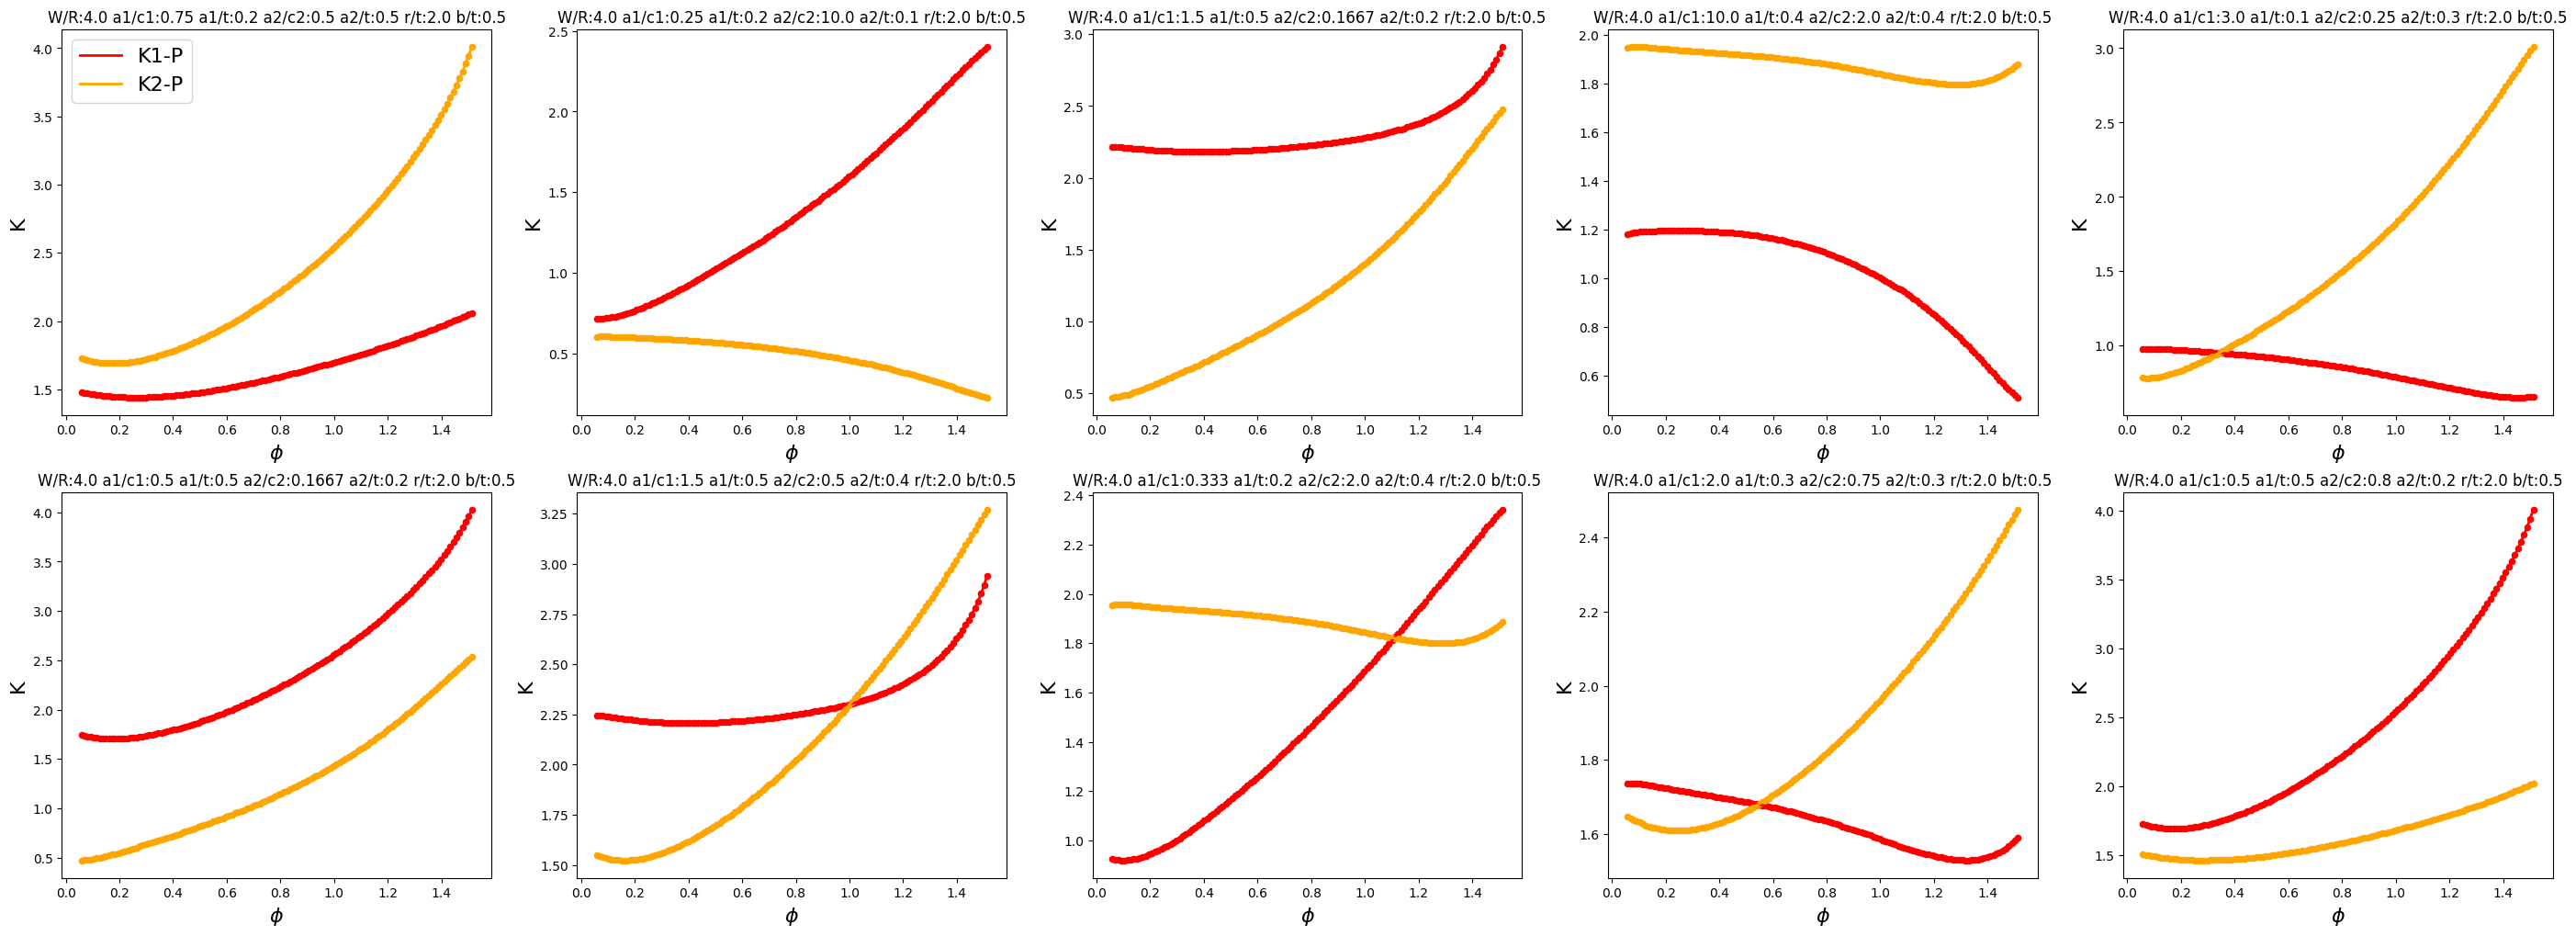

In [5]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-6], label="K1-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-6], color='purple', s=20)

        axs[i,j].plot(data[:,-7], data[:,-5], label="K2-T", color='blue', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-5], color='blue', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()


fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-4], label="K1-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-4], color='green', s=20)

        axs[i,j].plot(data[:,-7], data[:,-3], label="K2-B", color='cyan', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-3], color='cyan', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-2], label="K1-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-2], color='red', s=20)

        axs[i,j].plot(data[:,-7], data[:,-1], label="K2-P", color='orange', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-1], color='orange', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [6]:
df_test = pd.read_csv("../files/data/TWIN/CORNER_CRACK_COUNTERSUNK_HOLE/TWIN_CORNER_CRACK_CS2_QUARTER_ELLIPSE_PART_2_TEST.csv")
df_test

,c_index,W/R,a1/c1,a1/t,a2/c2,a2/t,r/t,b/t,phi_1,phi_2,K1-T,K2-T,K1-B,K2-B,K1-P,K2-P
0,1.0,4.0,0.1,0.1,0.1,0.1,2.0,0.5,0.057913,0.057913,0.847648,0.847648,0.766645,0.766645,0.269618,0.269618
1,1.0,4.0,0.1,0.1,0.1,0.1,2.0,0.5,0.069369,0.069369,0.862952,0.862952,0.779375,0.779375,0.274561,0.274561
2,1.0,4.0,0.1,0.1,0.1,0.1,2.0,0.5,0.080826,0.080826,0.881337,0.881337,0.794852,0.794852,0.280444,0.280444
3,1.0,4.0,0.1,0.1,0.1,0.1,2.0,0.5,0.092282,0.092282,0.902027,0.902027,0.812237,0.812237,0.287091,0.287091
4,1.0,4.0,0.1,0.1,0.1,0.1,2.0,0.5,0.103739,0.103739,0.924430,0.924430,0.831000,0.831000,0.294330,0.294330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6671099,9998.0,40.0,10.0,0.5,10.0,0.3,2.0,0.5,1.467061,1.467061,1.468660,0.952946,0.011756,0.240289,0.378671,0.247430
6671100,9998.0,40.0,10.0,0.5,10.0,0.3,2.0,0.5,1.478518,1.478518,1.445237,0.931099,0.010632,0.234388,0.372752,0.241773
6671101,9998.0,40.0,10.0,0.5,10.0,0.3,2.0,0.5,1.489974,1.489974,1.426098,0.910968,0.009667,0.229004,0.367767,0.236562
6671102,9998.0,40.0,10.0,0.5,10.0,0.3,2.0,0.5,1.501431,1.501431,1.410699,0.892939,0.008836,0.224147,0.363739,0.231954


In [7]:
# Get unique combinations of the first four columns
CC_combinations = df_test.iloc[:, 1:8].drop_duplicates().to_numpy()

print(len(CC_combinations))

52118


In [8]:
print("Different W/r values: ", np.unique(CC_combinations[:,0], axis=0))
print("Different a1/c1 values: ", np.unique(CC_combinations[:,1], axis=0))
print("Different a1/t values: ", np.unique(CC_combinations[:,2], axis=0))
print("Different a2/c2 values: ", np.unique(CC_combinations[:,3], axis=0))
print("Different a2/t values: ", np.unique(CC_combinations[:,4], axis=0))
print("Different r/t values: ", np.unique(CC_combinations[:,5], axis=0))
print("Different b/t values: ", np.unique(CC_combinations[:,6], axis=0))

Different W/r values:  [  2.4   2.6   2.8   3.6   4.    4.6   5.8   7.    8.    9.   10.   12.
  30.   40.  100. ]
Different a1/c1 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a1/t values:  [0.1 0.2 0.3 0.4 0.5]
Different a2/c2 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a2/t values:  [0.1 0.2 0.3 0.4 0.5]
Different r/t values:  [0.5 1.  1.5 2.  3.  5. ]
Different b/t values:  [0.5]


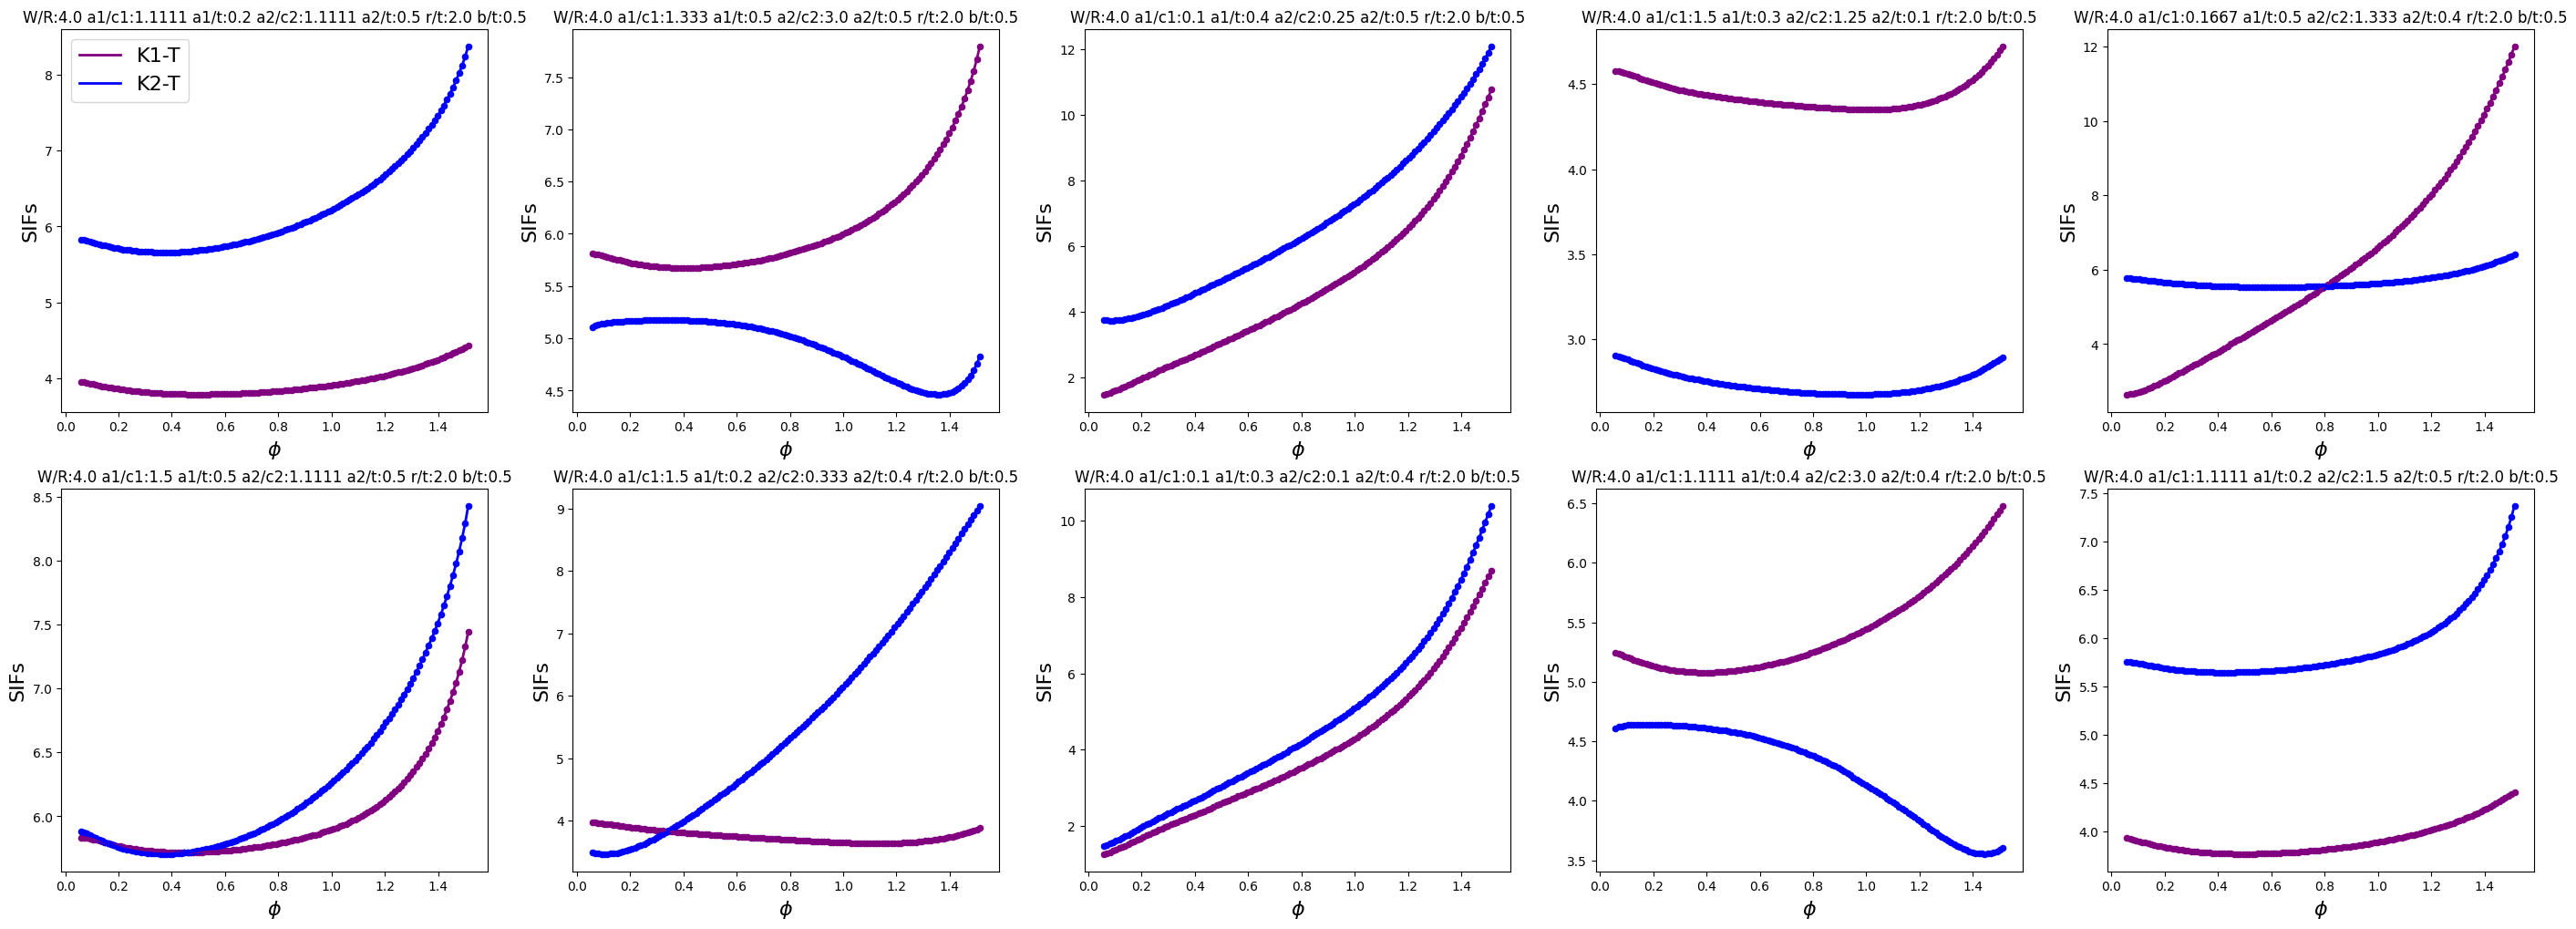

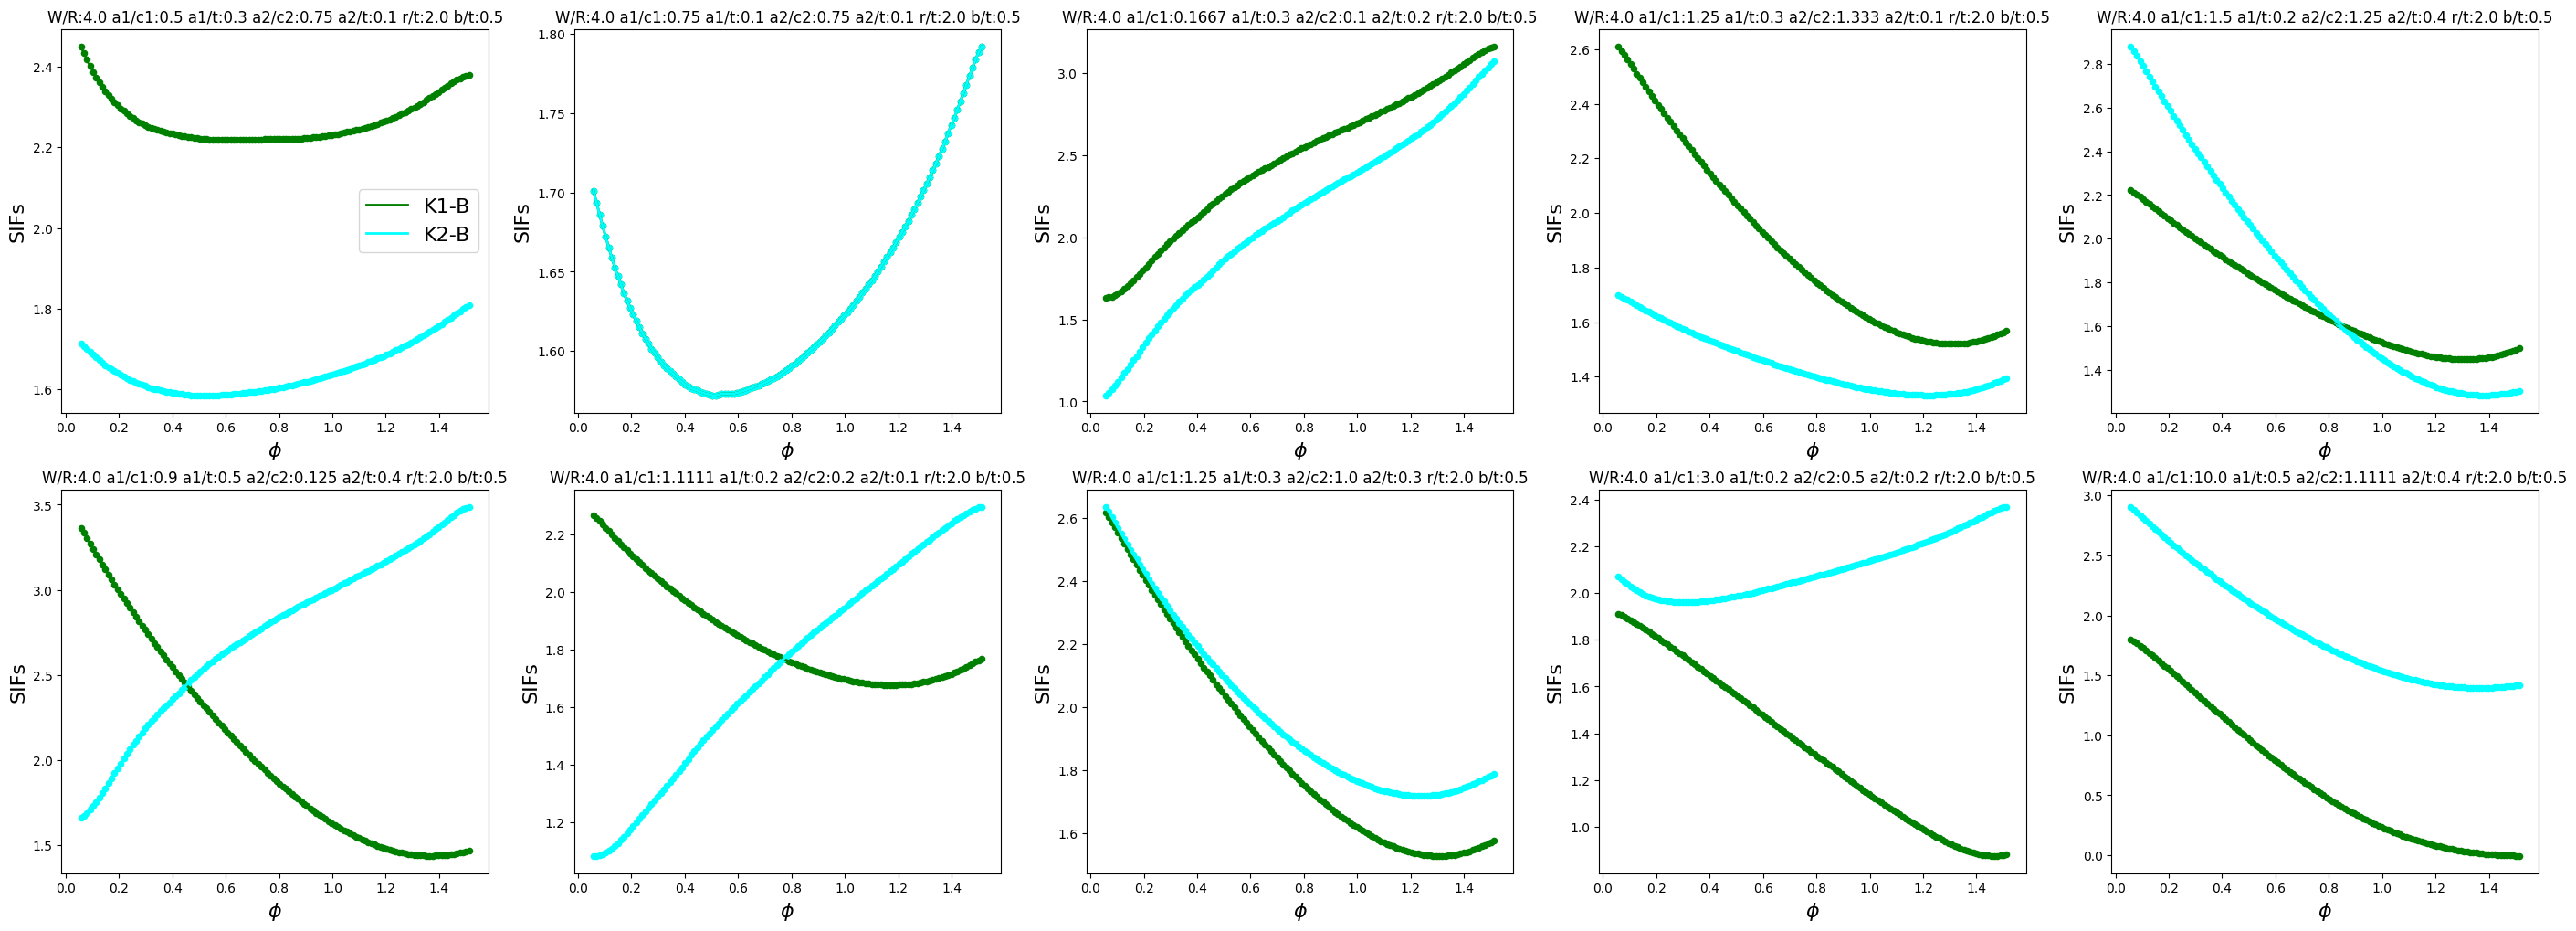

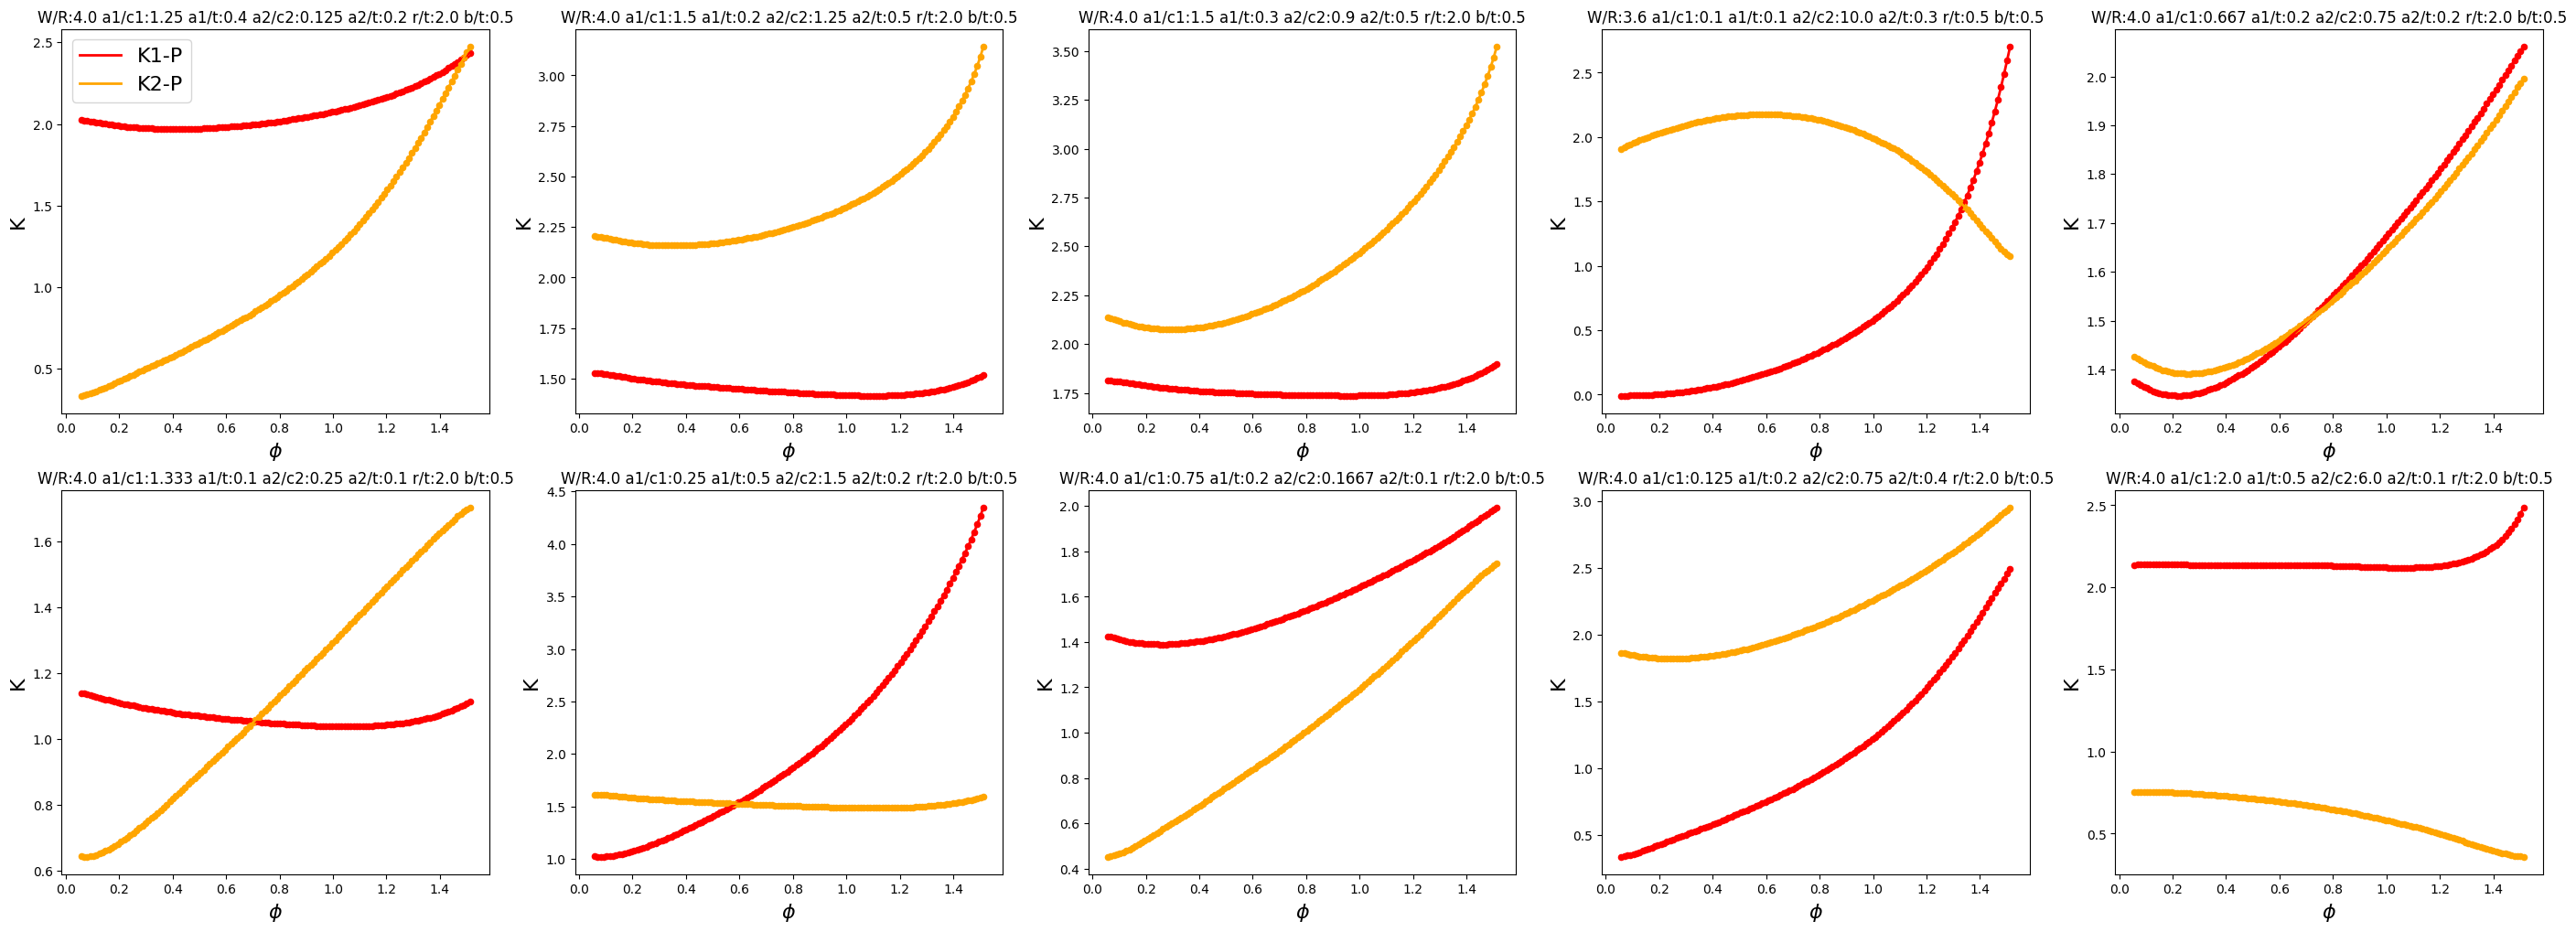

In [9]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-6], label="K1-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-6], color='purple', s=20)

        axs[i,j].plot(data[:,-7], data[:,-5], label="K2-T", color='blue', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-5], color='blue', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()


fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-4], label="K1-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-4], color='green', s=20)

        axs[i,j].plot(data[:,-7], data[:,-3], label="K2-B", color='cyan', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-3], color='cyan', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-2], label="K1-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-2], color='red', s=20)

        axs[i,j].plot(data[:,-7], data[:,-1], label="K2-P", color='orange', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-1], color='orange', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()